In [4]:
import pandas as pd, numpy as np
import geopandas
from shapely.geometry import Point, box
from shapely.geometry.polygon import Polygon

from matplotlib import pyplot as plt

# Byområder
url = 'Geodata/DK_SHAPE_UTM32-EUREF89/FOT/DIVERSE/'
# to_crs omdanner koordinater til en flade (modsat en kugle/globe)
omraade = geopandas.read_file(url + 'omraadepolygon.shp').to_crs({'init': 'epsg:4326'})

# Havneinstallationer
url = 'Geodata/DK_SHAPE_UTM32-EUREF89/FOT/HYDRO/'
havn = geopandas.read_file(url + 'havn.shp').to_crs({'init': 'epsg:4326'})

# Kun kysthavne og ingen havne under minimum
havn = havn[havn['HAVNTYPE'] == 'Kyst'][havn['UNDER_MIN'] == 'f']
havn.reset_index(inplace=True, drop=True)


C:\Users\pot\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [14]:
# Hent Danmarkskort med landsdele
url = 'geodata/NUTS_RG_01M_2016_4326_LEVL_3.geojson'
nuts3 = geopandas.read_file(url)
nuts3_dk = nuts3[nuts3['CNTR_CODE'].isin(['DK'])].to_crs({'init': 'epsg:4096'})

nuts3_dk.reset_index(inplace=True, drop=True)

nuts3_dk.head(1)


,id,CNTR_CODE,NUTS_NAME,LEVL_CODE,FID,NUTS_ID,geometry
0,DK013,DK,Nordsjælland,3,DK013,DK013,(POLYGON ((648450.6503807913 1189827.325455677...


In [29]:
# Danske havne med navn og geopunkt
csv = pd.read_csv('statistiske havne dk.csv')

geometry = [Point(xy) for xy in zip(csv.lon, csv.lat)]
crs = {'init': 'epsg:4326'}

dkhavne = geopandas.GeoDataFrame(csv, crs=crs, geometry=geometry)
dkhavne.head(2)



,country,mca,unLocode,name,nuts3,lon,lat,flon,flat,geometry
0,DK,DK00,DKAAB,Aabenraa,DK032,9.417580,55.035686,9.417580,55.035686,POINT (9.417579651 55.03568649)
1,DK,DK00,DKAAL,Aalborg,DK050,9.916667,57.050000,9.916667,57.050000,POINT (9.916666667000001 57.05)


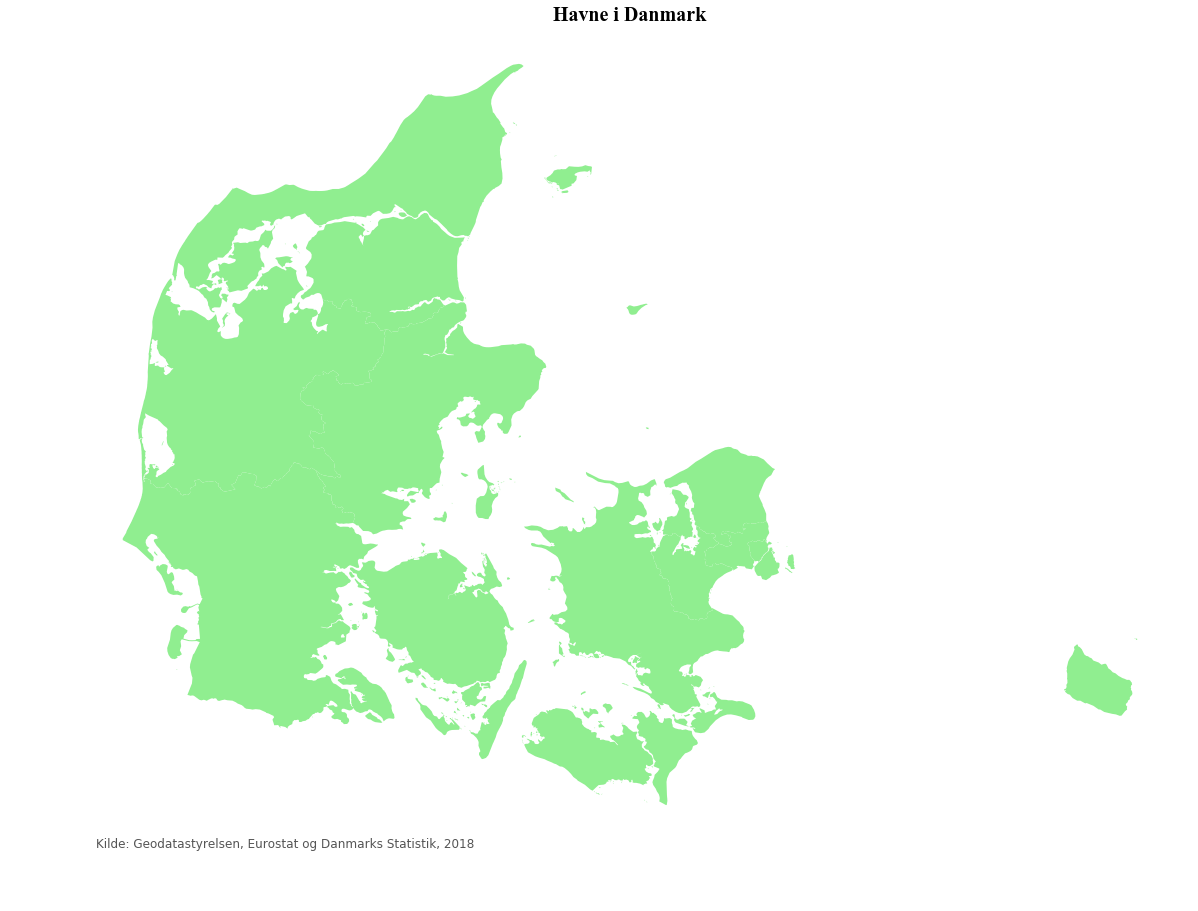

In [15]:
f, a = plt.subplots(figsize=(20,15))
a.set_axis_off()
# kort med landsdelene markeret
# nuts3_dk.plot(ax=a, column='id', cmap='Set3')
# kort med hele danmark
nuts3_dk.plot(ax=a, color='Lightgreen')
# havn.plot(ax=a, color='Red')

# omraade.plot(ax=a, color='Navy')

# Titel
a.set_title('Havne i Danmark', loc='center',
             fontdict={'family': 'Times New Roman', 'fontsize': '20', 'fontweight': 3})

# Note/kilde
a.annotate('Kilde: Geodatastyrelsen, Eurostat og Danmarks Statistik, 2018',xy=(0.08, 0.08),  \
            xycoords='figure fraction', horizontalalignment='left', \
            verticalalignment='top', fontsize=12, color='#555555')

# Gem figuren
f.savefig('havne4096.png')



In [25]:
# Interaktivt kort med danske statistiske havne, DataFrame=dkhavne
# bruger bokeh - se https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html

from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

# Point DataSource
psource = ColumnDataSource(dkhavne.drop('geometry', axis=1))

p = figure(title="A map")

p.circle('lon', 'lat', source=psource, color='red', size=10)

my_hover = HoverTool()

my_hover.tooltips = [('Address of the point', '@name'), ('NUTS3', '@nuts3')]

p.add_tools(my_hover)

# Give output filepath
outfp = "points.html"

# Save the plot by passing the plot -object and output path
save(obj=p, filename=outfp)


C:\Users\pot\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning:

save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN

C:\Users\pot\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning:

save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'



'H:\\Python\\points.html'

In [40]:
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
print(geojson)

output_file("geojson.html")

geo_source = GeoJSONDataSource(geojson=url)

p = figure(background_fill_color="lightgrey")
p.circle(x='x', y='y', size=15, alpha=0.7, source=geo_source)

show(p)

{"type":"FeatureCollection","features":[{"type":"Feature","id":"463098","geometry":{"type":"Point","coordinates":[-2.1208465099334717,51.4613151550293]},"properties":{"OrganisationCode":"Q64","OrganisationType":"Area Team","SubType":"UNKNOWN","OrganisationStatus":"Visible","IsPimsManaged":"True","OrganisationName":"Bath, Gloucestershire, Swindon And Wiltshire Area Team","Address1":"1st Floor","Address2":"Bewley House","Address3":"Marshfield Road","City":"Chippenham","County":"Wiltshire","Postcode":"SN15 1JW","Phone":"0113 8251 500","Email":"england.contactus@nhs.net","Website":"http://www.england.nhs.uk/south/south/bgsw-at/"}},{"type":"Feature","id":"463099","geometry":{"type":"Point","coordinates":[-2.5929524898529053,51.459877014160156]},"properties":{"OrganisationCode":"Q65","OrganisationType":"Area Team","SubType":"UNKNOWN","OrganisationStatus":"Visible","IsPimsManaged":"True","OrganisationName":"Bristol, North Somerset, Somerset And South Gloucestershire Area Team","Address1":"Sou

ValueError: expected JSON text, got 'geodata/NUTS_RG_01M_2016_4326_LEVL_3.geojson'